# This is my assignment 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from iteration import iterations

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


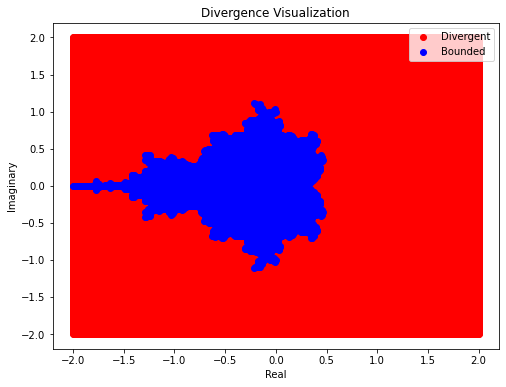

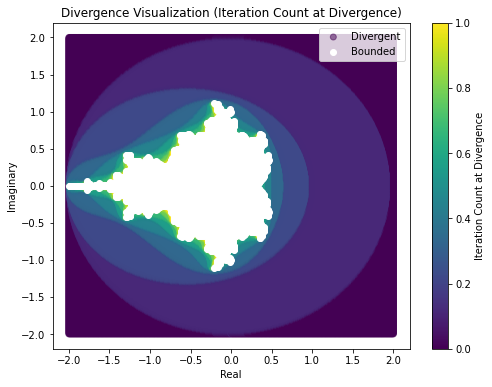

In [14]:
x_range = (-2.0, 2.01)
y_range = (-2.0, 2.01)
step = 0.01

abs_lst, div_lst, iter_lst = iterations(x_range, y_range, step)
            
# Plot the results 1
plt.figure(figsize=(8, 6))
plt.scatter(np.real(div_lst), np.imag(div_lst), color='red', label='Divergent')
plt.scatter(np.real(abs_lst), np.imag(abs_lst), color='blue', label='Bounded')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Divergence Visualization')
plt.legend()
plt.show()

#Plot the results 2 (+colourbar)
plt.figure(figsize=(8, 6))
plt.scatter(np.real(div_lst), np.imag(div_lst), c=iter_lst, cmap='viridis', label='Divergent', alpha=0.5)
plt.scatter(np.real(abs_lst), np.imag(abs_lst), color='white', label='Bounded')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Divergence Visualization (Iteration Count at Divergence)')
plt.colorbar(label='Iteration Count at Divergence')
plt.legend()
plt.show()
            
            

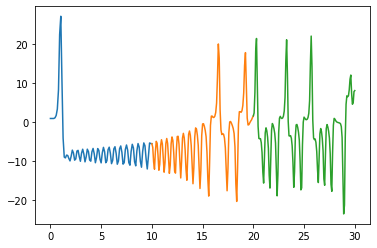

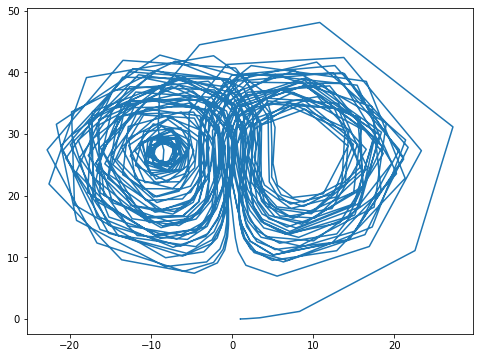

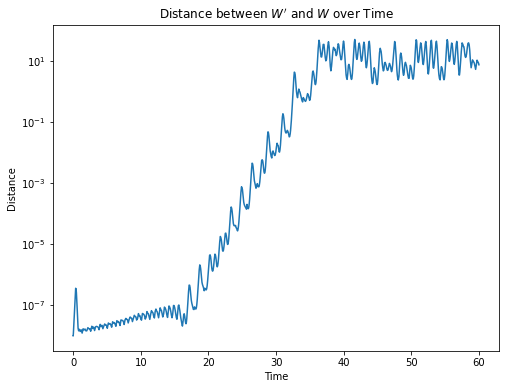

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
#yay
#i wanna die
#this is a distress call
def function(t, W, sig, r, b):
  """
  This is the function to put Lorenz equations in an array
  """
  X, Y, Z = W
  return np.array([-sig * (X - Y),
                  r * X - Y - X * Z,
                   -b * Z + X * Y])
  
#solving with ode solver
W_0 = [0.0, 1.0, 0.0]
sig = 10.0
r = 28.0
b = 8.0/3.0
params = (sig, r, b)
t_span = [0, 60]
sol = solve_ivp(function, t_span, W_0, args=params)
  
t = sol.t
W = sol.y
x_sol = W[0][-1]
y_sol = W[1][-1]
z_sol = W[2][-1]
[x_sol, y_sol, z_sol]

t = 0.01 * 1000

to_plot_1 = solve_ivp(function, [0, 10], W_0, args=params)
time_1 = np.linspace(0, 10, len(to_plot_1.y[1]))
plt.plot(time_1, to_plot_1.y[1])
#plt.show()

new_W_0 = [to_plot_1.y[0][-1], to_plot_1.y[1][-1], to_plot_1.y[2][-1]] #need to 
#reset the variables
to_plot_2 = solve_ivp(function, [10, 20], new_W_0, args=params)
time_2 = np.linspace(10, 20, len(to_plot_2.y[1]))
plt.plot(time_2, to_plot_2.y[1])
#plt.show()

newer_W_0 = [to_plot_2.y[0][-1], to_plot_2.y[1][-1], to_plot_2.y[2][-1]] #once
#again, need to reset the variables
to_plot_3 = solve_ivp(function, [20, 30], newer_W_0, args=params)
time_3 = np.linspace(20, 30, len(to_plot_3.y[1]))
plt.plot(time_3, to_plot_3.y[1])
#plt.show()

#question 4 
plt.figure(figsize=(8, 6))
t_start = 0.1*1400
t_end = 0.1*1900
to_plot_4 = solve_ivp(function, [t_start, t_end], W_0, args=params)
plt.plot(sol.y[1], sol.y[2])
plt.show()

#question 5
W_0 = [0.0, 1.0, 0.0]
W_prime_0 = [0.0, 1.0 + 1e-8, 0.0]

# Calculate distance between W' and W as a function of time
sol_prime = solve_ivp(function, t_span, W_prime_0, args=params, t_eval=sol.t)
distance = np.linalg.norm(sol_prime.y - sol.y, axis=0)

# Plotting distance as a function of time on a semilog plot
plt.figure(figsize=(8, 6))
plt.semilogy(sol.t, distance)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance between $W\'$ and $W$ over Time')
plt.show()
